<a href="https://colab.research.google.com/github/HwangHanJae/BigDataPratice/blob/main/working_type1_diamondsets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv',index_col=0)

###Question 1

###carat과 price의 경향을 비교하기 위한 scatterplot그래프를 출력하시오

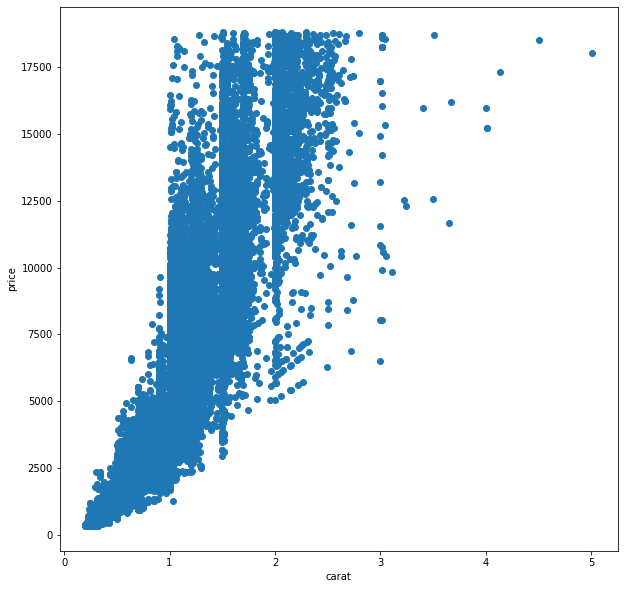

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(df['carat'],df['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

###Question 2

###carat과 price사이의 상관계수와 상관계수의 p-value값은?

In [6]:
import pandas as pd
df[["carat","price"]].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


In [11]:
import scipy.stats as stats

corr_by_scipy, p_value = stats.pearsonr(x=df["carat"],y=df["price"])
corr_by_scipy, p_value

(0.9215913011934771, 0.0)

###Question 3

###color에 따른 price 값의 분포는 아래와 같다.

In [12]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


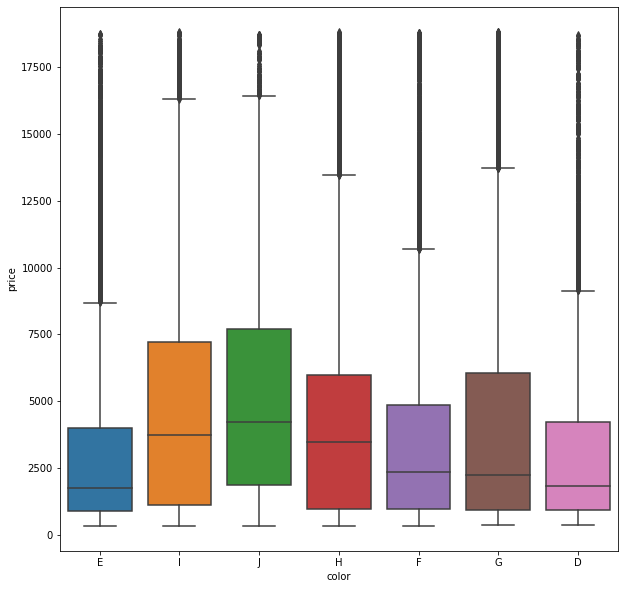

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='color', y='price')
plt.show()

###Question 3-1

###Diamond의 평균가격은 3932로 알려져있다. ‘H’ color를 가지는 다이아몬드 집단의 평균에 대한 일표본 t검정을 시행하려한다. 통계량과 pvalue값을 구하시오. 유의수준 0.05에서 귀무가설 채택여부를 boolean 값으로 표현할 변수(hypo) 만들고 출력하시오

In [26]:
import scipy.stats as stats
mean = 3932
dfH = df.loc[df["color"] == "H"]

statistic, p_value = stats.ttest_1samp(a=dfH["price"], popmean = mean)

print("통계랑 : ", statistic)
print("p-value : ", p_value)

if p_value < 0.05:
  hypo = False
else :
  hypo = True

print(hypo)

통계랑 :  11.988997411117696
p-value :  7.569973305218302e-33
False


###Question 3-2

###그래프상에서 ‘F’와 ‘G’는 평균이 유사해보인다.이를 확인하기 위해 집단간 등분산(levene,fligner,bartlett) 검정을 시행 후 결과를 출력하고조건에 맞는 독립표본 t검정을 시행하라

In [42]:
import scipy.stats as stats
group1 = df.loc[df["color"] == "F"]
group2 = df.loc[df["color"] == "G"]
levene, levene_pv = stats.levene(group1["price"], group2["price"])
fligner,  fligner_pv= stats.fligner(group1["price"], group2["price"])
bartlett, bartlett_pv = stats.bartlett(group1["price"], group2["price"])

p_values = [levene_pv, fligner_pv,bartlett_pv]

print(levene, levene_pv)
print(fligner, fligner_pv)
print(bartlett, bartlett_pv)
for p_value in p_values:
  if p_value < 0.05:
    hypo = False
  else:
    hypo = True
print("등분산 조건 확인시")
if hypo == True:
  print("귀무가설을 채택(p-value < 0.05) = F, G 집단간의 분산은 같다.")
  equal_var = True
else :
  print("귀무가설을 기각(p-value < 0.05) = F, G 집단간의 분산은 같지 않다.")
  equal_var = False
print()
#독립표본t검정실시(equal_var)
print("독립표본t검정실시(equal_var)")
statistic, p_value = stats.ttest_ind(group1["price"],group2["price"], equal_var=equal_var)
if p_value < 0.05:
  hypo=False
else :
  hypo = True
print("독립표본t검정 시행 시")
if hypo == True:
  print("귀무가설을 채택(p-value < 0.05) = F, G 집단간의 평균은 같다.")
else:
  print("귀무가설을 채택(p-value < 0.05) = F, G 집단간의 평균은 같지 않다.")

53.627886257416655 2.511093007074788e-13
37.04347553879807 1.155244880009172e-09
47.52732212008511 5.424264079418252e-12
등분산 조건 확인시
귀무가설을 기각(p-value < 0.05) = F, G 집단간의 분산은 같지 않다.

독립표본t검정실시(equal_var)
독립표본t검정 시행 시
귀무가설을 채택(p-value < 0.05) = F, G 집단간의 평균은 같지 않다.


###Question 3-3

###color ‘F’,’G’,’D’ 세집단의 price값들에 대해 anova분석을 시행하라.

In [54]:
import scipy.stats as stats
group1 = df.loc[df["color"] =="F"]["price"]
group2 = df.loc[df["color"] =="G"]["price"]
group3 = df.loc[df["color"] =="D"]["price"]
#등분산검정
print("등분산검정")
levene, levene_pv = stats.levene(group1, group2, group3)
fligner,  fligner_pv= stats.fligner(group1, group2, group3)
bartlett, bartlett_pv = stats.bartlett(group1, group2, group3)

p_values = [levene_pv, fligner_pv,bartlett_pv]

print(levene, levene_pv)
print(fligner, fligner_pv)
print(bartlett, bartlett_pv)
for p_value in p_values:
  if p_value < 0.05:
    hypo = False
  else:
    hypo = True
print("등분산 조건 확인시")
if hypo == True:
  print("귀무가설을 채택(p-value < 0.05) = F, G, D 집단간의 분산은 같다.")
  equal_var = True
else :
  print("귀무가설을 기각(p-value < 0.05) = F, G, D 집단간의 분산은 같지 않다.")
  equal_var = False

print()
print("정규성검정(kruskal)")
#정규성검정
kruskal_stat, kruskal_p_value = stats.kruskal(group1, group2, group3)
print("통계량 : ",kruskal_stat)
print("p value : ",kruskal_p_value)
if kruskal_p_value < 0.05:
    hypo = False
else:
    hypo = True
print("정규성 확인시")
if hypo == True:
  print("귀무가설을 채택(p-value < 0.05) 정규성 가정을 충족.")
else :
  print("귀무가설을 기각(p-value < 0.05) 정규성 가정을 불충족.")
print()
print("ANOVA(f_oneway)실시")
anova_stat, anova_p_value = stats.f_oneway(group1, group2, group3)
if anova_p_value < 0.05:
    hypo = False
else:
    hypo = True
print("ANOVA(f_oneway)실시후")
if hypo == True:
  print("귀무가설을 채택(p-value < 0.05) 세집단중 어느 두집단의 평균은 같다.")
else :
  print("귀무가설을 기각(p-value < 0.05) 세집단중 어느 두집단의 평균은 같지 않다.")
print()

등분산검정
118.97521469312785 3.557425577381817e-52
494.6459169558573 3.881538382653629e-108
289.1436443252346 1.6340125811454025e-63
등분산 조건 확인시
귀무가설을 기각(p-value < 0.05) = F, G, D 집단간의 분산은 같지 않다.

정규성검정(kruskal)
통계량 :  128.85771962090996
p value :  1.0444838013551115e-28
정규성 확인시
귀무가설을 기각(p-value < 0.05) 정규성 가정을 불충족.

ANOVA(f_oneway)실시
ANOVA(f_oneway)실시후
귀무가설을 기각(p-value < 0.05) 세집단의 평균은 같지 않다.



###Question 4

###연속형 변수(carat,depth,table,price,x,y,z) 각각의 이상치(1,3분위값에서 IQR*1.5 외의 값) 갯수를 데이터 프레임(변수명 ratio_df, 비율의 내림차순 정렬)으로 아래와 같이 나타내어라.

In [61]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv',index_col=0)



Q3 = df["carat"].quantile(0.75)
Q1 = df["carat"].quantile(0.25)

IQR = Q3-Q1
count = df.loc[(df["carat"] < Q1-(IQR*1.5)) | (df["carat"] > Q3+(IQR*1.5))]["carat"].count()

columns = ["carat", "depth","table","price",'x','y','z']
counts = []
#각각의 이상치 갯수 구하기
for column in columns:
  Q3 = df[column].quantile(0.75)
  Q1 = df[column].quantile(0.25)

  IQR = Q3-Q1
  counts.append(df.loc[(df[column] < Q1-(IQR*1.5)) | (df[column] > Q3+(IQR*1.5))][column].count())

col = {"column": columns, "ratio" : counts}
ratio_df = pd.DataFrame(col).sort_values(by='ratio', ascending=False)

ratio_df

,column,ratio
3,price,3540
1,depth,2545
0,carat,1889
2,table,605
6,z,49
4,x,32
5,y,29


###Question 5

###color에 따른 price의 max, min, 평균값을 colorDf 변수에 저장하고 아래와 같이 출력하는 코드를 작성하라

In [64]:
colorDf = df.groupby("color")["price"].agg(["max","min","mean"])
colorDf

,max,min,mean
color,,,
D,18693,357,3169.954096
E,18731,326,3076.752475
F,18791,342,3724.886397
G,18818,354,3999.135671
H,18803,337,4486.669196
I,18823,334,5091.874954
J,18710,335,5323.818020


###Question 6

###전체 데이터중 color의 발생빈도수에 따라 labelEncoding(빈도수 적은것 : 1, 빈도수 증가할수록 1씩증가)을 하고 colorLabel 컬럼에 저장하고 cut에 따른 colorLabel의 평균값을 구하여라

In [117]:
color_index = df.value_counts("color").sort_values(ascending=True).index
mapping = {}

for i,color in enumerate(color_index.to_list(),1):
  mapping[color] = i

df["colorLabel"] = df["color"].map(mapping)

df.groupby(["cut"])["colorLabel"].mean().to_frame()



{'D': 3, 'E': 6, 'F': 5, 'G': 7, 'H': 4, 'I': 2, 'J': 1}

In [121]:
#Answer
dic= {x: i+1 for i, x in enumerate(list(df.groupby('color').size().sort_values().index))}

df["colorLabel"] = df["color"].map(lambda x : dic[x])
mean_cut = df.groupby('cut')[['colorLabel']].mean()
mean_cut

,colorLabel
cut,
Fair,4.516770
Good,4.562780
Ideal,4.769152
Premium,4.644913
Very Good,4.654362


###Question 7

###price의 값에 따른 구간을 1000단위로 나누고 priceLabel 컬럼에 저장하라. 저장시 숫자 순으로 label하고(0 ~ 1000미만 : 0,1000이상 ~ 2000미만 :1 …) 최종적으로 구간별 갯수(변수명:labelCount)를 출력하라

In [163]:
df["priceLabel"] = pd.NA
#df.loc[(df["price"] >= value) & (df["price"] < 1000), "priceLabel"]
for i, value in enumerate(range(0, df["price"].max() + 1000, 1000)):
  df.loc[(df["price"] >= value) & (df["price"] < value+1000), "priceLabel"]=i

labelCount = df["priceLabel"].value_counts().to_frame().reset_index().rename(columns={"index" : "priceLabel","priceLabel":"counts"})
labelCount

,priceLabel,counts
0,0,14499
1,1,9704
2,2,6131
3,4,4653
4,3,4226
5,5,3174
6,6,2278
7,7,1669
8,8,1307
9,9,1076


In [160]:
#Answer
df["priceLable"] = df["price"].map(lambda x : x//1000)
labelCount = df[["priceLabel"]].value_counts().to_frame().reset_index().rename(columns={0 : "counts"})
labelCount

,priceLabel,counts
0,0,14499
1,1,9704
2,2,6131
3,4,4653
4,3,4226
5,5,3174
6,6,2278
7,7,1669
8,8,1307
9,9,1076
